In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
df_test.shape

(418, 11)

In [67]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
df_test.drop(['Cabin'],axis=1, inplace=True)
df_test.shape

(418, 10)

In [69]:
df= pd.get_dummies(df_test['Sex'], drop_first=True)
df_test.drop(['Sex'], axis=1, inplace=True)
df_test = pd.concat([df_test,df],axis=1, sort=False)
df_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,0


In [70]:
df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [71]:
# df= pd.get_dummies(df_test['Embarked'], drop_first=True)
# df_test.drop(['Embarked'], axis=1, inplace=True)
# df_test = pd.concat([df_test,df],axis=1, sort=False)
# df_test.head()

df_test.drop('Embarked', axis=1, inplace=True)

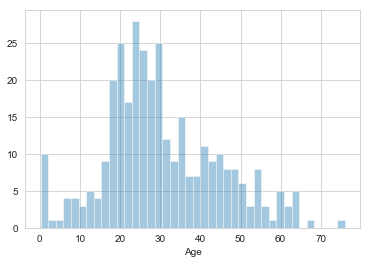

In [72]:
sns.set_style('whitegrid')
sns.distplot(df_test['Age'].dropna(), kde=False, bins=40)

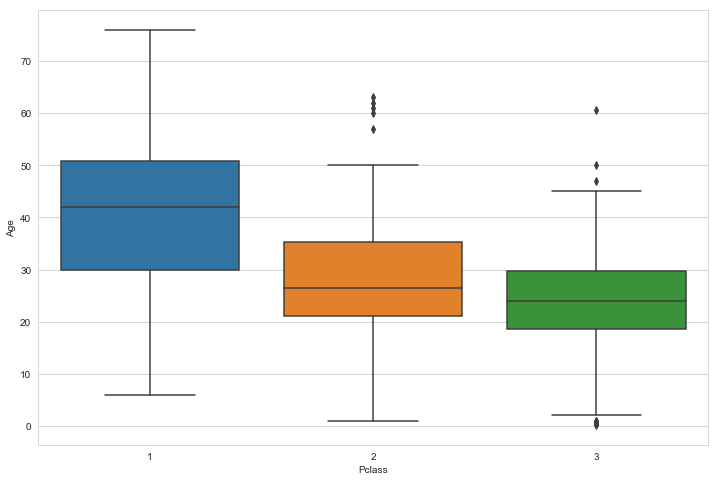

In [73]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data= df_test )

In [75]:
def rand_sample_impute(df, variable):
    df[variable+'_random'] = df[variable]
    # It will have the random samples to fill the NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same indices im order to merge the data seta
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample  

In [76]:
rand_sample_impute(df_test, 'Age')

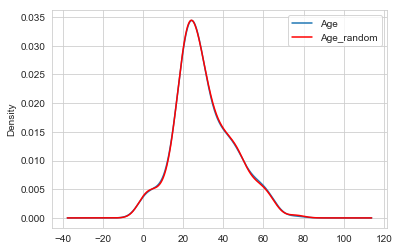

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_test.Age.plot(kind = 'kde', ax=ax)
df_test.Age_random.plot(kind ='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [78]:
df_test.drop('Age', axis=1, inplace=True)

In [79]:
df_test.rename(columns={'Age_random': 'Age'}, inplace=True)
df_test.head()

,Pclass,SibSp,Parch,Fare,male,Age
0,3,0,0,7.8292,1,34.5
1,3,1,0,7.0000,0,47.0
2,2,0,0,9.6875,1,62.0
3,3,0,0,8.6625,1,27.0
4,3,1,1,12.2875,0,22.0


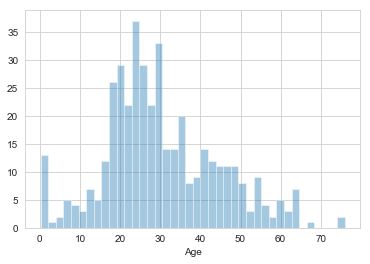

In [80]:
sns.set_style('whitegrid')
sns.distplot(df_test['Age'].dropna(), kde=False, bins=40)

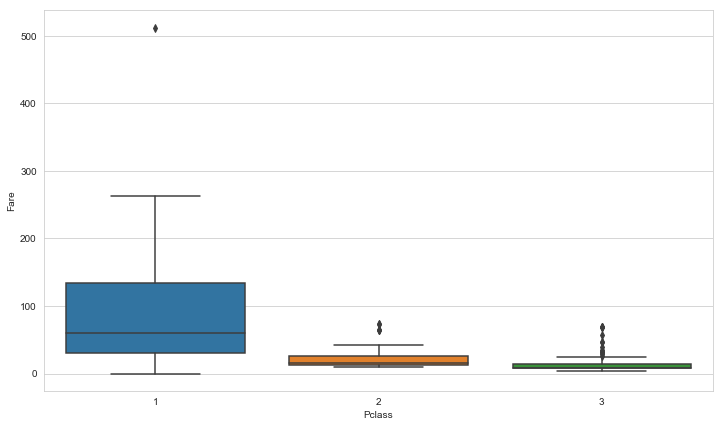

In [81]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare',data= df_test )

In [82]:
df_test[df_test['Fare'].isnull()].index.tolist()

[152]

In [83]:
df_test['Pclass'][152]

3

In [84]:
df_test['Fare'][152]=8

C:\Users\AJMAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_test.isnull().sum()

Pclass    0
SibSp     0
Parch     0
Fare      0
male      0
Age       0
dtype: int64

In [86]:
%store df_test

Stored 'df_test' (DataFrame)


In [87]:
df_test.head()

,Pclass,SibSp,Parch,Fare,male,Age
0,3,0,0,7.8292,1,34.5
1,3,1,0,7.0000,0,47.0
2,2,0,0,9.6875,1,62.0
3,3,0,0,8.6625,1,27.0
4,3,1,1,12.2875,0,22.0
